# Feature Detection and Description
### Line detection in python with OpenCV | Houghline method

 No lines detected. Try lowering HOUGH_THRESHOLD (e.g., 80, 100).
 Saved: image1_lines.jpg


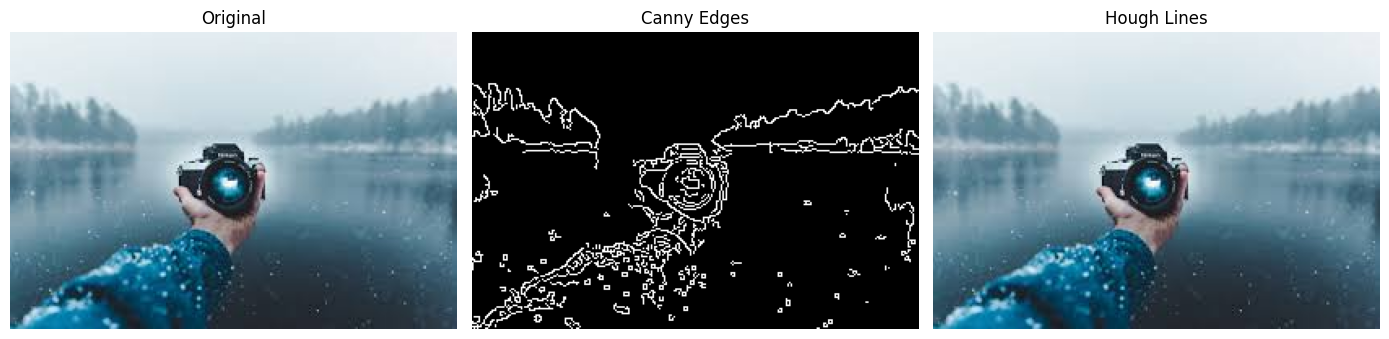

In [2]:
# Hough Line Detection (Neat + Safe) — works in .ipynb (shows output) and saves result

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ---------- CONFIG ----------
IMAGE_PATH = "image1.jfif"         
OUT_PATH   = "image1_lines.jpg"
CANNY1, CANNY2 = 50, 150
HOUGH_THRESHOLD = 120             # lower = more lines (try 80–160)
MAX_LINES_TO_DRAW = 50            # limit drawing to avoid clutter
# ----------------------------

# Load image
img = cv2.imread(IMAGE_PATH)

if img is None:
    print(" Image not found. Files in folder:", os.listdir("."))
    raise FileNotFoundError(f"Could not load: {IMAGE_PATH}")

# Gray + edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, CANNY1, CANNY2, apertureSize=3)

# Hough Lines
lines = cv2.HoughLines(edges, 1, np.pi/180, HOUGH_THRESHOLD)

# Draw lines (if any)
output = img.copy()

if lines is None:
    print(" No lines detected. Try lowering HOUGH_THRESHOLD (e.g., 80, 100).")
else:
    # lines shape: (N, 1, 2) => r, theta
    lines_to_draw = lines[:min(len(lines), MAX_LINES_TO_DRAW)]
    for r_theta in lines_to_draw:
        r, theta = r_theta[0]

        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * r
        y0 = b * r

        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(output, (x1, y1), (x2, y2), (0, 0, 255), 2)

    print(f" Lines detected: {len(lines)} (drawn: {len(lines_to_draw)})")

# Save output
cv2.imwrite(OUT_PATH, output)
print(" Saved:", OUT_PATH)

# Display in notebook (matplotlib)
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Hough Lines")
plt.axis("off")

plt.tight_layout()
plt.show()

### Circle Detection using OpenCV

Files in folder: ['1111100_Ill_Pain_4096x2160.mov', 'contrast_stretch.jpg', 'env', 'eye.jfif', 'gamma_transformed0.1.jpg', 'gamma_transformed0.5.jpg', 'gamma_transformed1.2.jpg', 'gamma_transformed2.2.jpg', 'image1.jfif', 'image1_bilateral.jpg', 'image1_lines.jpg', 'inpainted.png', 'log_transformed.jpg', 'mask.jpg', 'opencv(1).ipynb', 'opencv(2).ipynb', 'opencv(3).ipynb', 'opencv(4).ipynb', 'opencv(5).ipynb', 'output.jpg']


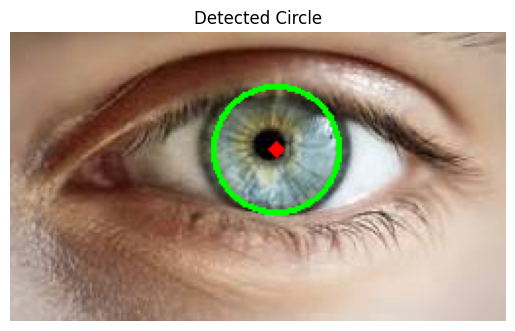

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print("Files in folder:", os.listdir())

img = cv2.imread("eye.jfif")  

if img is None:
     raise FileNotFoundError(" eye.jfif not found in folder")

output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=100,
    param1=100,
    param2=40,
    minRadius=30,
    maxRadius=60
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    x, y, r = circles[0][0]
    cv2.circle(output, (x, y), r, (0, 255, 0), 2)
    cv2.circle(output, (x, y), 2, (0, 0, 255), 3)
else:
    print(" No circles detected")

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Circle")
plt.axis("off")
plt.show()

In [7]:
# Detect corner of an image
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [8]:
img = cv2.imread('eye.jfif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
# Detect Corners

corners = cv2.goodFeaturesToTrack(
    gray,
    maxCorners=27,
    qualityLevel=0.01,
    minDistance=10,
    blockSize=3,
    useHarrisDetector=False,
    k=0.04
)

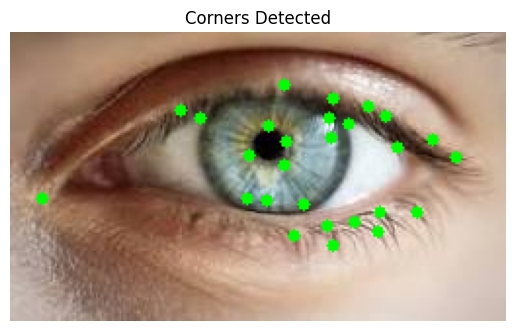

In [10]:
# Draw and Display Results
 

corners = np.intp(corners)   
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), radius=3, color=(0, 255, 0), thickness=-1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Corners Detected')
plt.axis('off')
plt.show()

### Corner Detection with Shi-Tomasi Corner Detection Method using OpenCV

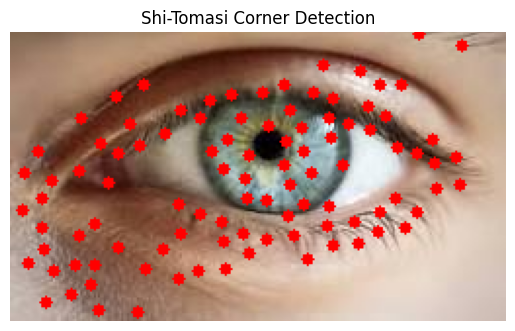

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('eye.jfif')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10)
corners = np.int32(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, (0, 0, 255), -1)  

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')  
plt.show()

### Corner detection with Harris Corner Detection method

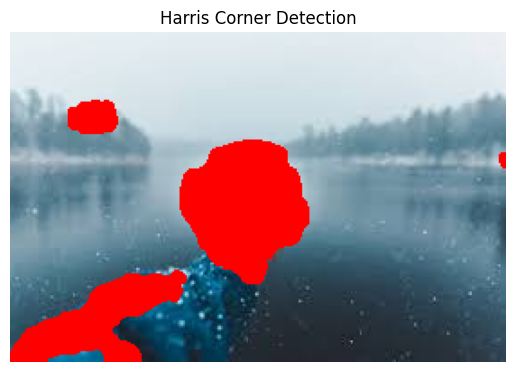

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "image1.jfif"  
image = cv2.imread(image_path)

operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
operatedImage = np.float32(operatedImage)


dest = cv2.cornerHarris(operatedImage, 17, 21, 0.01)
dest = cv2.dilate(dest, None)

image[dest > 0.01 * dest.max()] = [0, 0, 255]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Harris Corner Detection')
plt.axis('off')  
plt.show()

### Find Circles and Ellipses in an Image

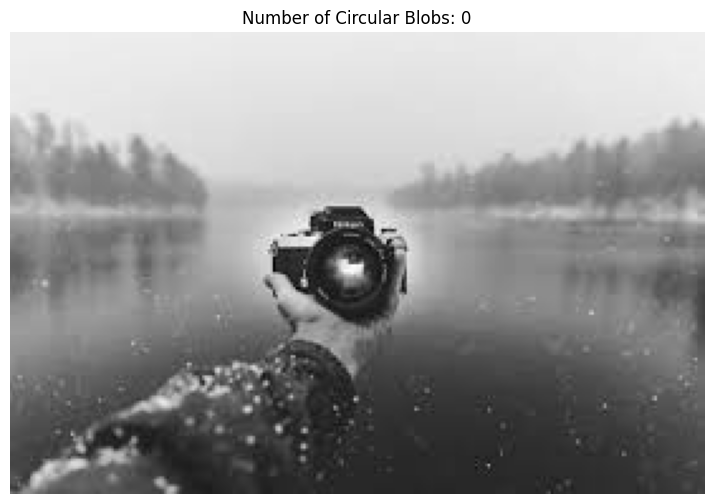

 Saved: blobs_detected.jpg


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

 
image_path = "image1.jfif"    

image = cv2.imread(image_path, 0)  # grayscale

if image is None:
    print(" Image not found. Files in folder:", os.listdir("."))
    raise FileNotFoundError(f"Could not load: {image_path}")

# Blob detector parameters
params = cv2.SimpleBlobDetector_Params()

params.filterByArea = True
params.minArea = 100

params.filterByCircularity = True
params.minCircularity = 0.9

params.filterByConvexity = True
params.minConvexity = 0.2

params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(image)

# Draw blobs
blobs = cv2.drawKeypoints(
    image, keypoints, None, (0, 0, 255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

text = f"Number of Circular Blobs: {len(keypoints)}"
blobs_color = cv2.cvtColor(blobs, cv2.COLOR_BGR2RGB)  # for matplotlib

plt.figure(figsize=(10,6))
plt.imshow(blobs_color)
plt.title(text)
plt.axis("off")
plt.show()

# Save output
cv2.imwrite("blobs_detected.jpg", blobs)
print(" Saved: blobs_detected.jpg")

### Document field detection using Template Matching

In [4]:
# importing libraries
import numpy as np
import imutils
import cv2

field_threshold = { "prev_policy_no" : 0.7,
                    "address"        : 0.6,
                  }

# Function to Generate bounding
# boxes around detected fields
def getBoxed(img, img_gray, template, field_name = "policy_no"):

    w, h = template.shape[::-1] 

    # Apply template matching
    res = cv2.matchTemplate(img_gray, template,
                           cv2.TM_CCOEFF_NORMED)

    hits = np.where(res >= field_threshold[field_name])

    # Draw a rectangle around the matched region. 
    for pt in zip(*hits[::-1]): 
        cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h),
                                    (0, 255, 255), 2)

        y = pt[1] - 10 if pt[1] - 10 > 10 else pt[1] + h + 20

        cv2.putText(img, field_name, (pt[0], y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1)

    return img


# Driver Function
if __name__ == '__main__':

    # Read the original document image
    img = cv2.imread('image1.jfif')
      
    # 3-d to 2-d conversion
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     
    # Field templates
    template_add = cv2.imread('image1.jfif', 0)
    template_prev = cv2.imread('eye.jfif', 0)

    img = getBoxed(img.copy(), img_gray.copy(),
                       template_add, 'address')

    img = getBoxed(img.copy(), img_gray.copy(),
                   template_prev, 'prev_policy_no')

    cv2.imshow('Detected', img)

#### Smile detection using OpenCV

In [5]:
import cv2

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_smile.xml')

In [7]:
cap = cv2.VideoCapture(0)